<a href="https://colab.research.google.com/github/properallan/ENE300/blob/main/tarefas/trabalho_1/Trabalho%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
plt.rcParams['savefig.dpi'] = 150

from autograd import grad


# Introdução


Deseja-se construir uma caixa com uma folha de papelão tamanho A4 ($210\times297$ mm), que possibilite armazenar o maior volume possível. A função $f$ modela o volume dessa caixa em função da espessura das margens, denotada por $x$. Dessa forma o problema pode ser forumalado como um problema de otimização, onde o objetivo é maximizar a funcão

$$
f(x) = 4x^3-1014x^2+62370x
$$

, sujeita à restrição 

$$
0 \leq x \leq 105
$$

A Figura a seguir apresenta graficamente a modelagem do problema. A restrição para esse problema é obtida notando-se que nenhum dos comprimentos pode ser menor que zero.

<center>
  <img src="https://github.com/properallan/ENE300/blob/main/tarefas/trabalho_1/A4.png?raw=1" width=40% style="margin-left:auto; margin-right:auto">
</center>


O problema em questão pode ser resolvido analiticamente, sabendo que o máximo para a função $f(x)$ ocorre em um ponto onde a derivada é nula

$$
\frac{df}{dx} = 12x^2-2028x+62370 = 0
$$

As duas raízes possíveis são 

$$
\begin{aligned}
x_1 =&  \frac{169}{2} - \frac{\sqrt{7771}}{2} \approx 40.42 \\
x_2 =&  \frac{169}{2} + \frac{\sqrt{7771}}{2} \approx 128.58
\end{aligned}
$$

, como a solução $x_2$ viola a restrição $x\leq105$ a única solução possível é $x_1$, resta determinar se o ponto é realmente de máximo, seja a segunda derifada da função $f$

In [ ]:
x_opt_a = 169/2 - np.sqrt(7771)/2

$$
\frac{d^2 f}{dx^2} \bigg\rvert_{x_1} = 24x-2028 \bigg\rvert_{x_1} = -1057.84
$$

, como $\frac{d^2 f}{dx^2} \bigg\rvert_{x_1} \lt 0$, $x_1$ é ponto de máximo e portanto solução do problema proposto. Pela sua simplicidade o problema também poderia ser resolvido graficamente. Utilizaremos a linguagem `python`, nessa linguaguem a função `f(x)` é a implementação direta da função objetivo $f(x)$.

In [ ]:
def f(x):
    return 4*x**3-1014*x**2+62370*x

Define-se um domínio discreto para a função $f$, como a função $f$ está definida em todo o domínio dos números reais, o domínio foi arbitrariamente escolhido no intervalo $-10 ≤ x ≤ 200$.



In [ ]:
x = np.linspace(-10, 200, 100)

Para a análise gráfica, plotamos o domínio viável de soluções representado pela região delimitada pelas restrições. Por meio de inspeção visual é possível estimar um valor candidato à ótimo em $x=40$. Apesar da simplicidade e eficacácia do método, ele pode tornar-se inviável para funções de multiplas variáveis e muitas restrições. Em geral deseja-se utilizar métodos numéricos, com algoritmos capazes de contornar esses problemas. Vamos estudar a *Busca Dicontômica*, *Método da Bissecção* e *Método de Newton*.

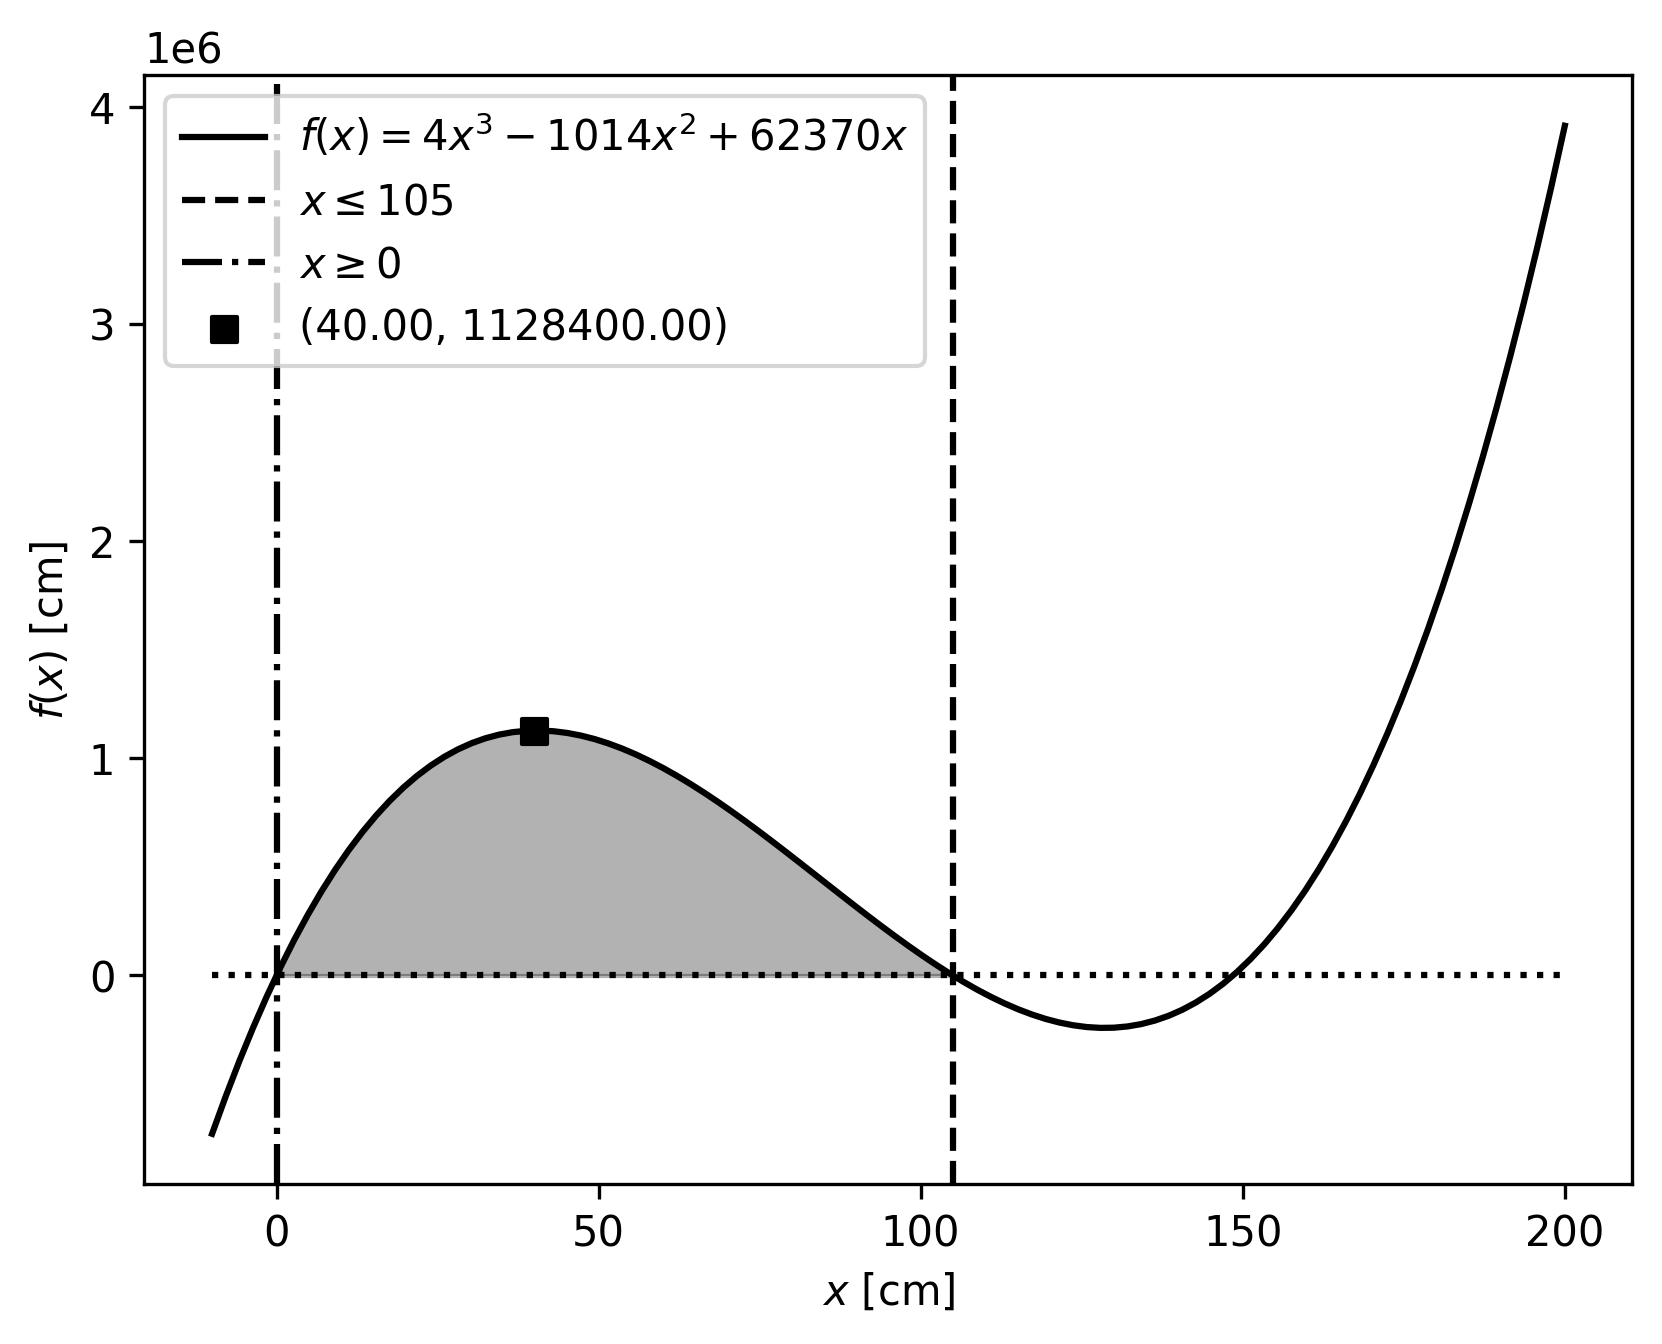

In [ ]:
def plot_problem(x, f, x_opt):
  # plot function
  plt.plot(x, f(x), c='k', label=rf'$f(x)=4x^3-1014x^2+62370x$')

  # plot restrictions
  plt.plot(x, np.zeros_like(x), c='k', ls=':')
  plt.axvline(105, c='k', ls='--', label=rf'$x \leq 105$')
  plt.axvline(0, c='k', ls='-.', label=rf'$x \geq 0$')

  # plot viable solutions
  plt.fill_between(x, 0, f(x), where=((x>=0) & (x<=105)), color='k', alpha=0.3)
  plt.xlabel(rf'$x$ [cm]')
  plt.ylabel(rf'$f(x)$ [cm]')

  # plot optimum solution
  plt.scatter(x_opt, f(x_opt), marker='s', c='k', label=rf'({x_opt:.2f}, {f(x_opt):.2f})')
  plt.legend()

x_opt=40

plot_problem(x, f, x_opt)


# Busca Dicotômica

NO método de *Busca Dicontômica*, a cada nova iteração, o intervalo de busca é reduzido pela metade. Com a escolha adequada de $a, b$ e $\epsilon$ o método converge para o mínimo da função $f$, se $f$ for unimodal no intervalo $[a,b]$, ou seja, se $f$ atinge seu mínimo global $x^* \in \;]a,b[$ e para quaisquer $x_1,x_2 \in [a,b]$, verificar-se que

$$
\begin{aligned}
f(x_2) < f(x_1) \qquad &, se \; x_1 < x_2 < x^* \\
f(x_1) < f(x_2) \qquad &, se \; x^* < x_1 < x_2 
\end{aligned}
$$

Vamos descrever uma iteração do método. Escolhe-se dois pontos $x_1$ e $x_2$ suficientemente próximos do ponto médio de incerteza, para isso $\epsilon$ é escolhido muito pequeno. Um novo intervalo de busca é escolhido avaliando-se o valor da função nos pontos $x_1$ e $x_2$, verficando-se que $f(x_1) > f(x_2)$, define-se o novo intervalo $a=x_1$ e $b=b$, caso contrário, escolhe-se um novo intervalo $a=a$ e $b=x_2$. O algoritmo segue até atingir um critério de parada.

$$
\begin{aligned}
x_1 = \frac{a+b}{2}-\epsilon\\
x_2 = \frac{a+b}{2}+\epsilon
\end{aligned}
$$

<center>
  <img src="https://github.com/properallan/ENE300/blob/main/tarefas/trabalho_1/busca_dicotomica.png?raw=1" width=50% style="margin-left:auto; margin-right:auto">
</center>

A função `dichotomous_search` implementa o algoritmo proposto, com um critério de parada 

$$
|a-b| < 10 \epsilon
$$

, ou ainda uma quantidade de iterações máxima fixada `itmax`. Note $\epsilon$ não pode ser tão pequeno a ponto de comprometer a solução por erros de arredodamento que tornarem o valor da função $f$ igual tanto no ponto $x_1$, quanto no ponto $x_2$.

In [ ]:
def dichotomous_search(f, a, b, epsilon, objective='minimize', itmax=100, prompt=False):
    if objective == 'maximize':
      f_ = f
      f = lambda x: -f_(x)

    if prompt: print(f"{'it':<6}{'a':>10}{'b':>10}{'error':>10}{'x1':>10}{'x2':>10}{'f_x1':>16}{'f_x2':>16}")
    it = 0
    error = epsilon*100.0
    x_hist=[]
    while (error >= epsilon*10.0 and itmax == 0) or (itmax > 0 and it < itmax):
        x1 = (a + b)/2.0 - epsilon
        x2 = (a + b)/2.0 + epsilon
        f_x1 = f(x1)
        f_x2 = f(x2)
        if f_x1 > f_x2:
            a = x1
        else:
            b = x2

        it += 1
        error = abs(a-b)

        if prompt: print(f"{it:<6d}{a:>10.4f}{b:>10.4f}{error:>10.4f}{x1:>10.4f}{x2:>10.4f}{f_x1:>16.4f}{f_x2:>16.4f}")
        x_opt = (a + b) / 2.0 
        x_hist.append(x_opt)
    if prompt: print(f"x_opt: {x_opt}")
        
    return x_opt, np.array(x_hist)

In [ ]:
x_opt_ds, x_hist_ds = dichotomous_search(f, a=0.0, b=105.0 , epsilon=1e-10, objective='maximize', itmax=0)

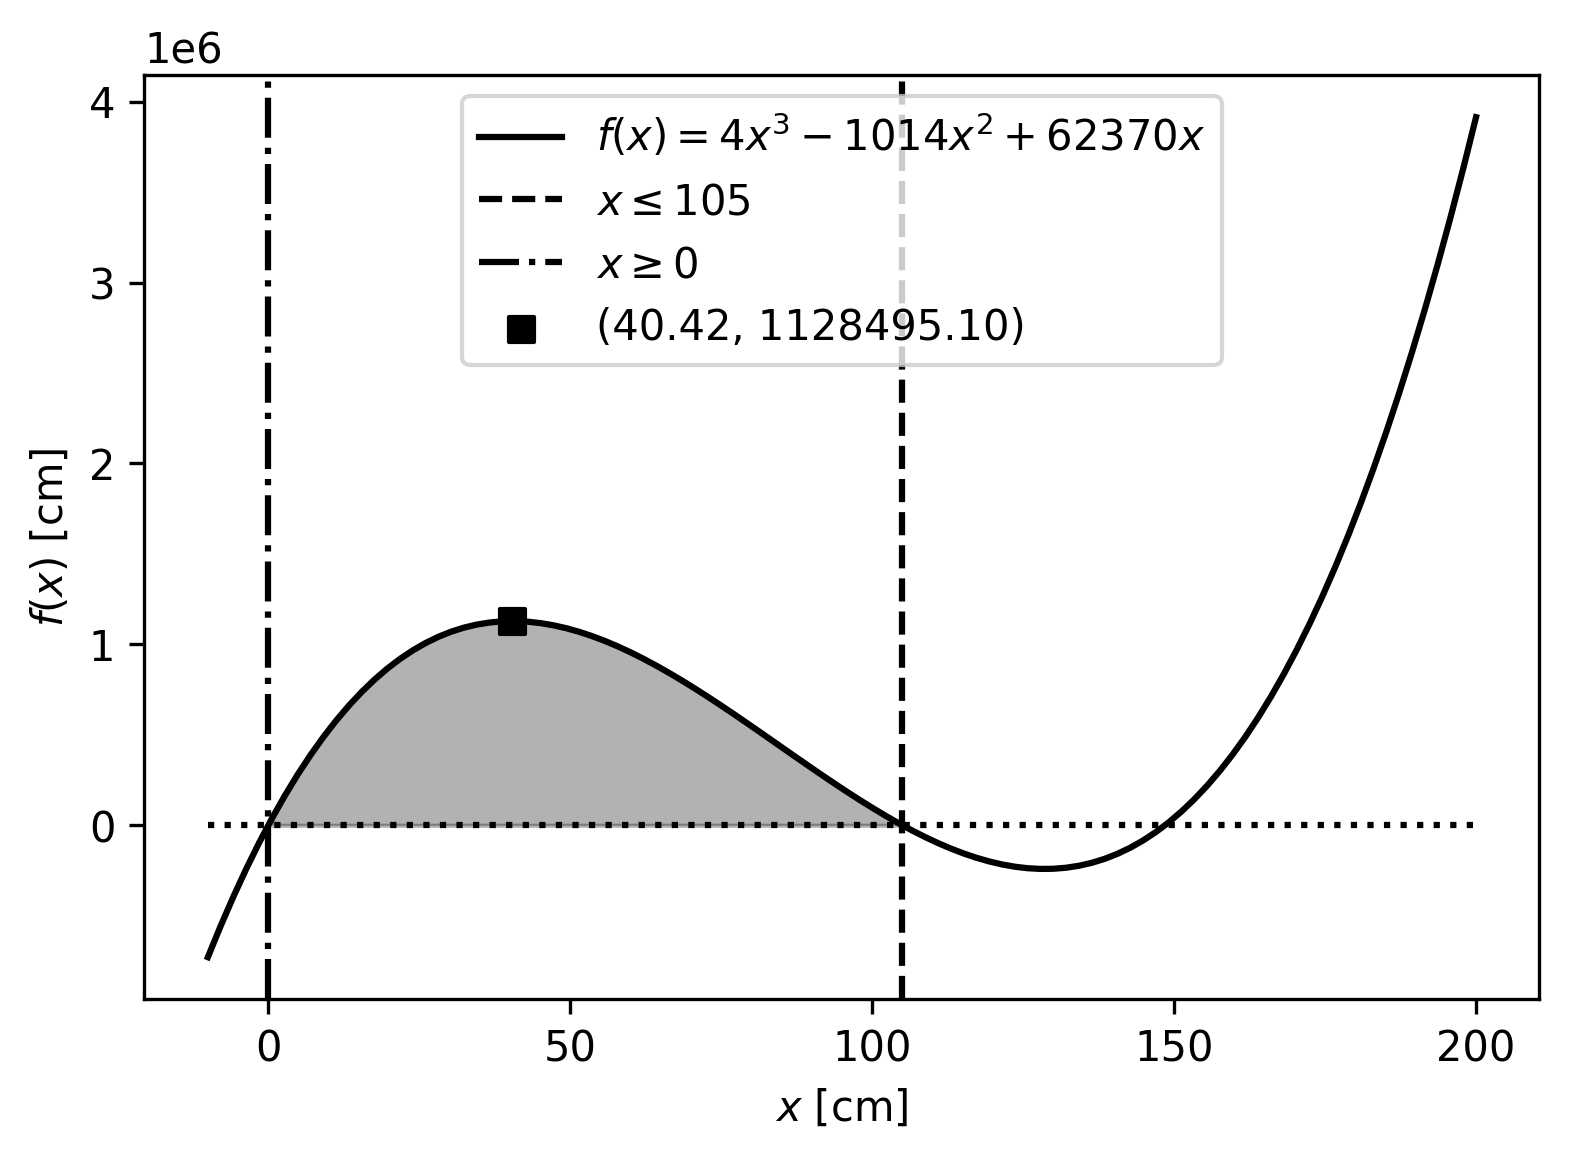

In [ ]:
plt.figure(figsize=(6,4))
plot_problem(x, f, x_opt_ds)

# Método da Bissecção

Assim como no método da *Busca Dicotômica*, o método da bissecção elimina metade do intervalo de busca a cada nova iteração. Como novidade, temos que esse método utiliza a informação de derivada da função para atualizar os limites do novo intervalo de busca.

<center>
  <img src="https://github.com/properallan/ENE300/blob/main/tarefas/trabalho_1/bisseccao.png?raw=1" width=50% style="margin-left:auto; margin-right:auto">
</center>

A cada iteração um novo intervalo é escolhido de acordo com o sinal da derivada qualculada no ponto médio $x_1=\frac{(a+b)}{2}$

$$
\begin{aligned}
a = x_1 \qquad &, se \; f'(x_1) < 0 \\
b = x_1\qquad &, se \; f'(x_1) > 0
\end{aligned}
$$

, como critério de parada foi escolhido um valor de $\epsilon$ para o valor absoluto da difereça entre os limites do intervalo.

$$
|a-b| < \epsilon
$$

In [ ]:
def bissection(f, a, b, epsilon=1e-5, itmax=0, objective='minimize', prompt=False):
    if objective == 'maximize':
      f_ = f
      f = lambda x: -f_(x)

    it = 0
    error = epsilon*2

    if prompt : print(f"{'it':<6}{'a':>10}{'b':>10}{'error':>10}{'x1':>10}{'f_x1':>16}{'df_x1':>16}")
    x_hist=[]
    while (error >= epsilon and itmax==0) or (itmax > 0 and it < itmax):
        x1 = (a + b) / 2
        f_x1 = f(x1)
        df_x1 = grad(f)(x1)

        if df_x1 > 0:
            b = x1
        elif df_x1 <=0:
            a = x1
        elif df_x1 == 0:
            error = 0

        it += 1
        error = abs(a-b)
        
        x_opt = (a + b) / 2
        x_hist.append( x_opt )
        if prompt: print(f"{it:<6d}{a:>10.4f}{b:>10.4f}{error:>10.4f}{x1:>10.4f}{f_x1:>16.4f}{df_x1:>16.4f}")

    if prompt: print(f"x_opt: {x_opt}")
    return x_opt, np.array(x_hist)


In [ ]:
x_opt_bi, x_hist_bi = bissection(f, 0, 105.0, 1e-10, itmax=0, objective='maximize')

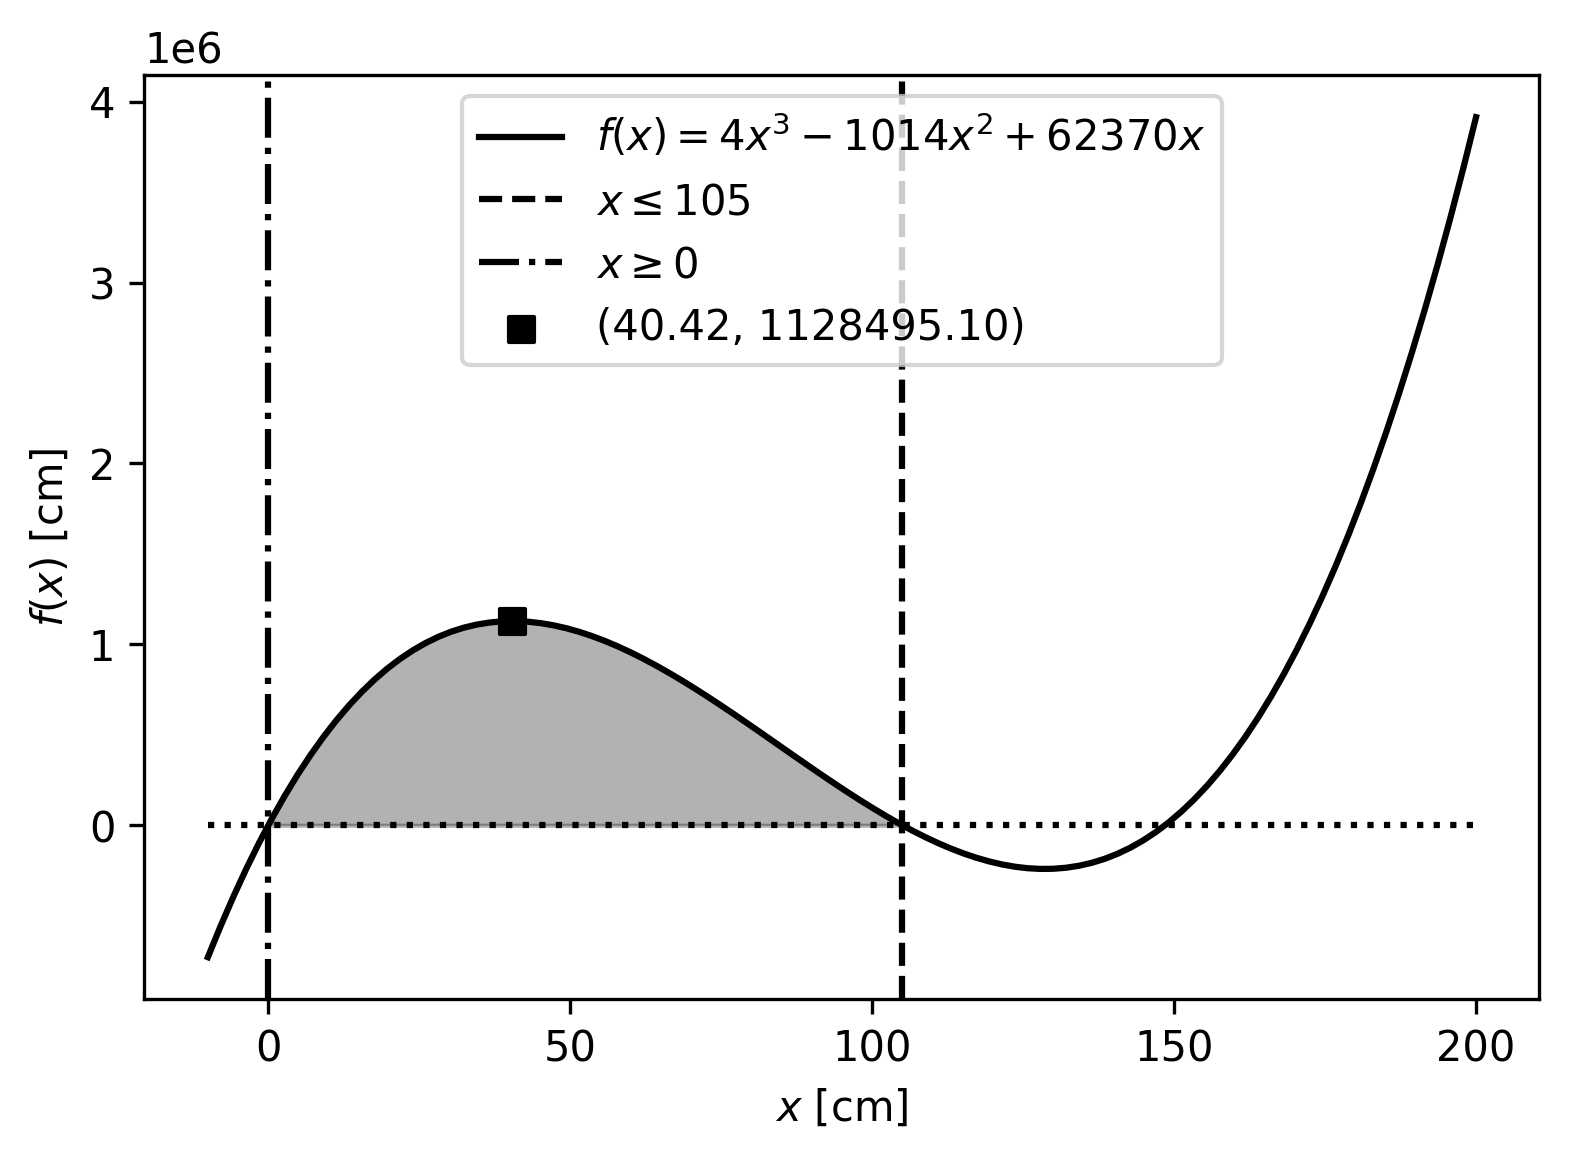

In [ ]:
plt.figure(figsize=(6,4))
plot_problem(x, f, x_opt_bi)

# Método de Newton


O método de *Newton*, além da informação de derivada primeira, utiliza a derivada segunda da função para atualizar o valor candidato à ótimo $x_{i+1}$ da próxima iteração.

$$
x_{i+1} = x_i - \frac{f'(x_i)}{f''(x_i)}
$$

A função `newton_method` implementa o método de newton, utilizando como critério de parada

$$
|x_{i+1}-x_i| < \epsilon
$$

, $\epsilon$ pode ser tão pequeno quanto se queira, outra opção é utilizar um máximo de iterações como critério de parada. Diferentemente dos algoritmos anteriores, esse método não requere um intervalo de busca, mas apenas um chute inicial.

In [ ]:
def newton_method(f, x0, epsilon, itmax=0, objective='minimize', prompt=False):
    if objective == 'maximize':
      f_ = f
      f = lambda x: -f_(x)

    df = grad(f)
    d2f = grad(df)

    xi = x0
    it = 0
    error = 2*epsilon

    if prompt: print(f"{'it':<6}{'xi':>10}{'error':>10}{'f_xi':>16}{'df_xi':>16}{'d2f_xi':>16}")
    x_hist = []  
    while (error >= epsilon and itmax==0) or (itmax > 0 and it < itmax):
        f_xi = f(xi)
        df_xi = df(float(xi))
        d2f_xi = d2f(float(xi))
        
        x_new = xi - df_xi / d2f_xi
        error=np.abs(x_new - xi)
        xi = x_new
        it += 1
     
        x_hist.append(x_new)
        if prompt: print(f"{it:<6}{xi:>10.4f}{error:>10.4f}{f_xi:>16.4f}{df_xi:>16.4f}{d2f_xi:>16.4f}")
     
    x_opt = x_new
    if prompt: print(f"x_opt: {x_opt}")

    return x_opt, np.array(x_hist)

In [ ]:
x_opt_ne,x_hist_ne = newton_method(f, 0.0, epsilon=1e-10, itmax=0, objective='maximize')

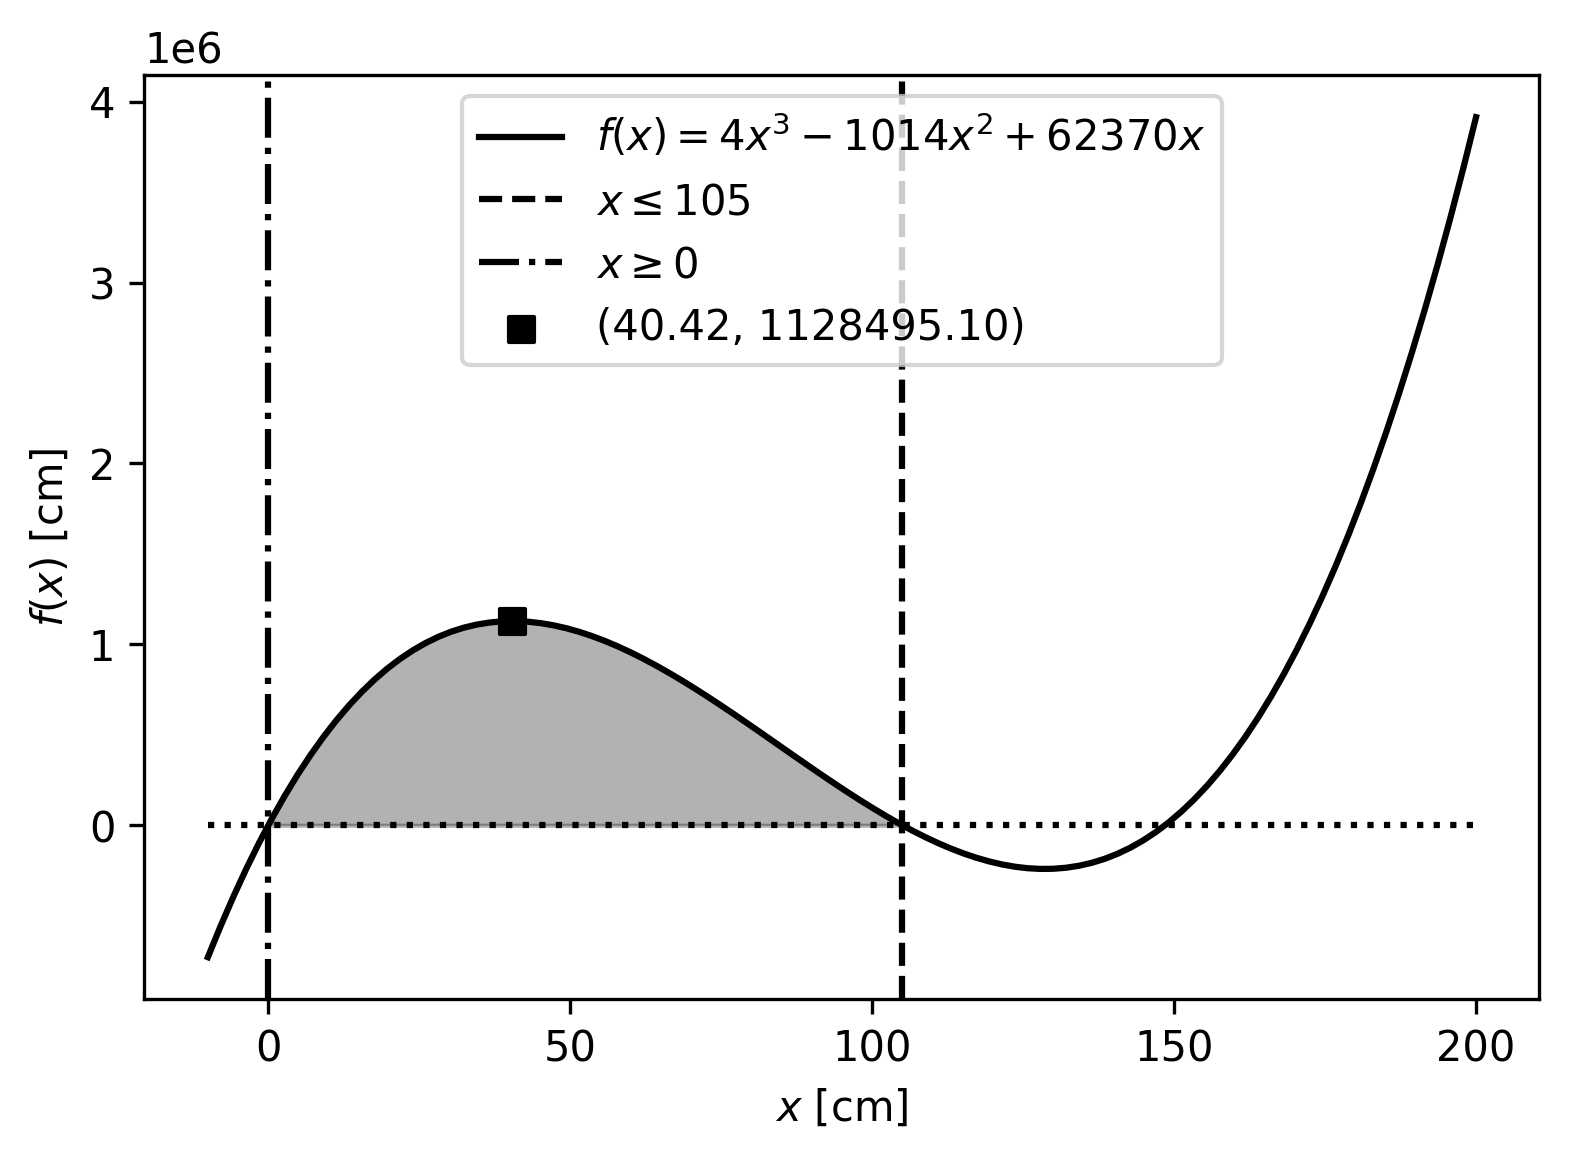

In [ ]:
plt.figure(figsize=(6,4))
plot_problem(x, f, x_opt_ne)

# Análise dos Resultados


O método da *Busca Dicotômica* é altamente sensível ao valor de $\epsilon$ escolhido. Uma análise do erro, definido como

$$
erro = log(|x_{opt}-x^*|)
$$

onde $x_{opt}$ é o valor ótimo obtido pelo método numérico e $x^*$ é o valor ótimo obtido analiticamente, mostra que o menor erro foi obtido para $\epsilon=1\times 10^{-4}$, à partir desse valor, diminuir o valor de $\epsilon$ de fato aumenta o erro do método numérico.


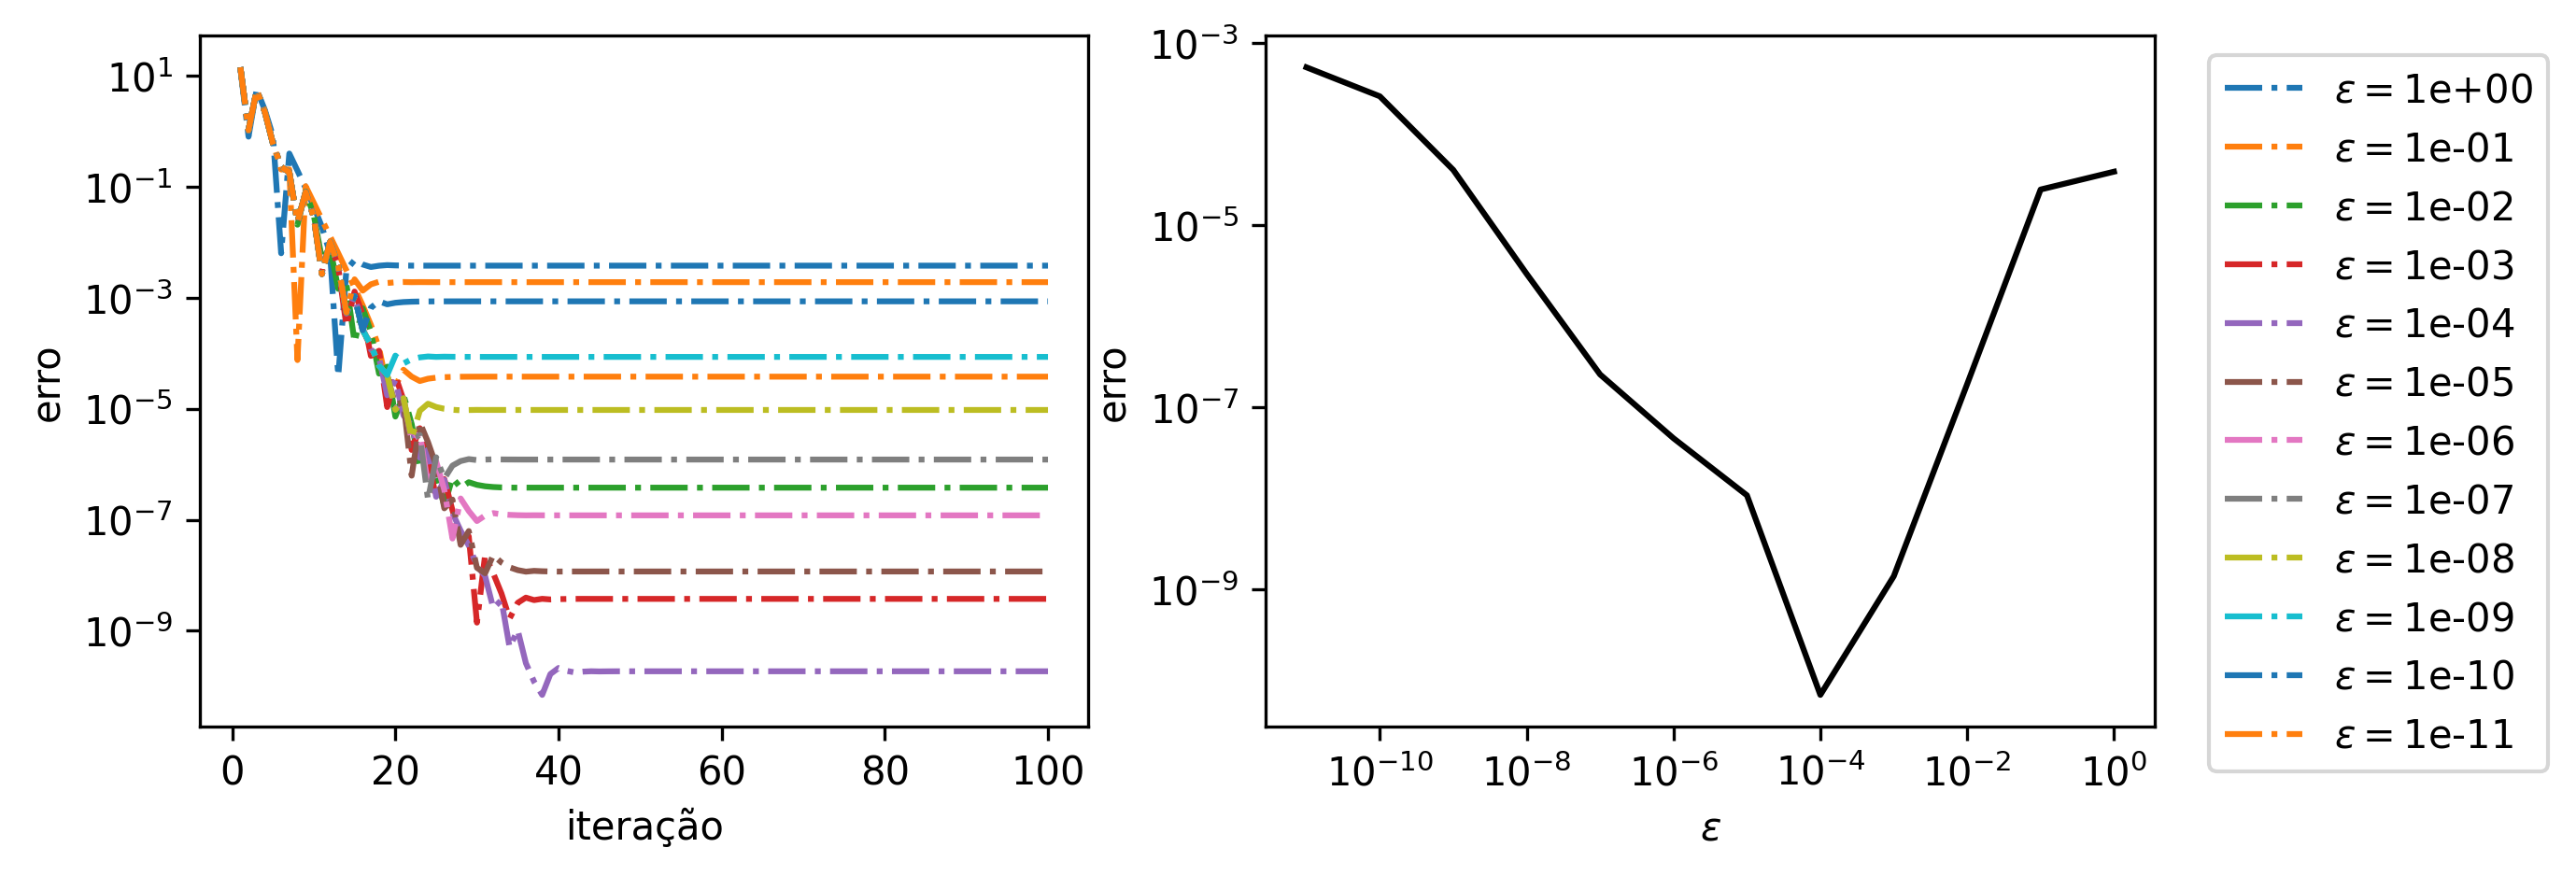

In [ ]:
fig = plt.figure(figsize=(9,3.2))
ax1 = plt.subplot(121)

errors = []
for eps in np.logspace(0, -11, 12):
  x_opt_ds, x_hist_ds = dichotomous_search(f, a=0.0, b=105.0 , epsilon=eps, objective='maximize', itmax=100)

  it = np.arange(0, len(x_hist_ds))+1
  error_ds = abs(x_hist_ds - x_opt_a)
  plt.plot(it, error_ds, ls='-.', label=rf"$\epsilon=${eps:1.0e}")

  errors.append(np.min(error_ds))

plt.ylabel('erro')
plt.xlabel('iteração')
plt.yscale('log')

ax2 = plt.subplot(122)
plt.plot(np.logspace(0, -11, 12), errors, color='k')
plt.ylabel('erro')
plt.xlabel(r'$\epsilon$')
plt.yscale('log')
plt.xscale('log')

ax1.legend(bbox_to_anchor=(2.24, 1), loc="upper left")

Escolhendo $\epsilon=1\times 10^{-4}$, o método da *Busca Dicotômica* foi também comparado com os demais quanto à convergência, admitindo o critério de parada de 100 iterações.

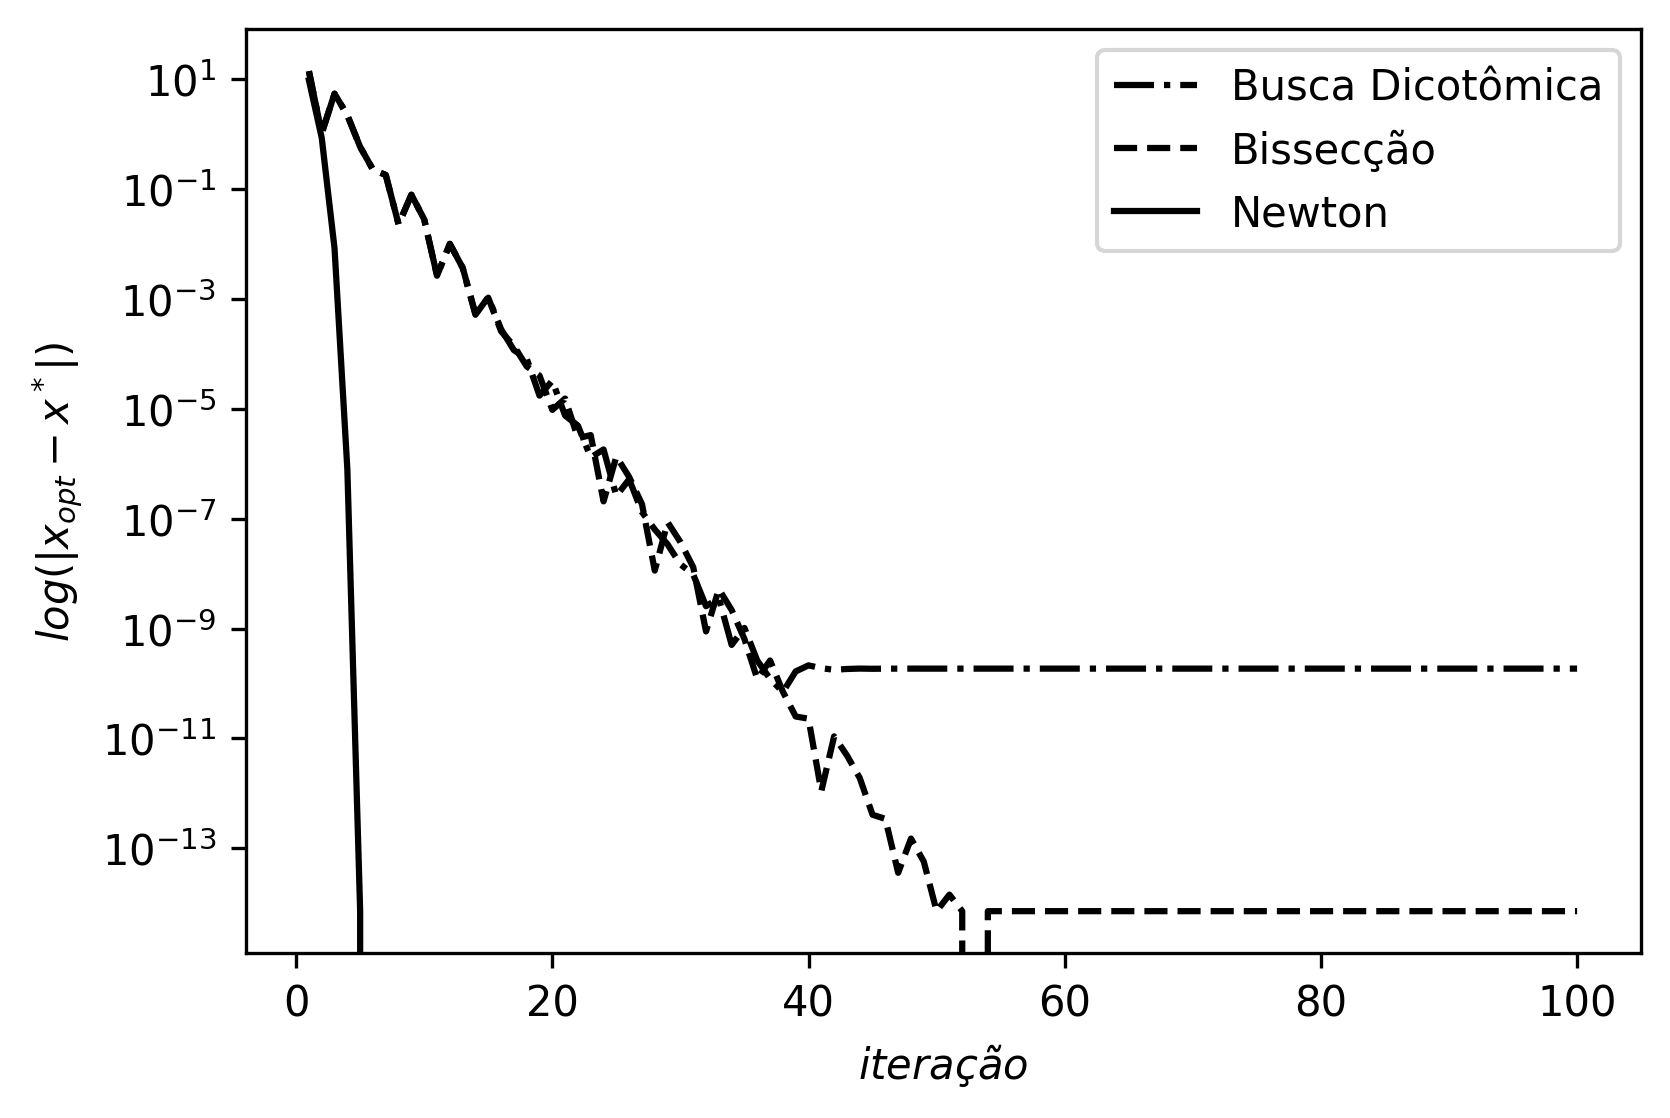

In [ ]:
x_opt_ds, x_hist_ds = dichotomous_search(f, a=0.0, b=105.0 , epsilon=1e-4, objective='maximize', itmax=100)
x_opt_bi, x_hist_bi = bissection(f, 0, 105.0, epsilon=1e-10, itmax=100, objective='maximize')
x_opt_ne, x_hist_ne = newton_method(f, 0.0, epsilon=1e-10, itmax=100, objective='maximize')

error_ds = abs(x_hist_ds - x_opt_a)
error_bi = abs(x_hist_bi- x_opt_a)
error_ne = abs(x_hist_ne- x_opt_a)

it=np.arange(0,len(error_ds))+1

plt.figure(figsize=(6,4))
plt.plot(it, error_ds, ls='-.', c='k', label='Busca Dicotômica')
plt.plot(it, error_bi, ls='--', c='k', label='Bissecção')
plt.plot(it, error_ne, ls='-', c='k', label='Newton')
plt.legend()
plt.xlabel('$iteração$')
plt.ylabel(r"$log(|x_{opt}-x^*|)$")
plt.yscale('log')

Notou-se que o método da *Bissecção* apresenta uma taxa de convergência equivalente ao método da Busca Dicotômica, como vantagem a performance do método não depende da escolha de algum hiperparâmetro. Além disso o método obteve erros ainda menores que a *Busca Dicotômica* quando executado por mais iterações.

Claramente o método de *Newton* é o mais eficiente dentre os apresentados, com uma taxa de convergencia muito superior aos demais e valores erros limitdos apenas pela precisão da artimética de ponto flutuante do computador. Certamente a superioridade do método vêm acompanhada de um incremento do custo computacional de cada uma das  iterações. 

A Tabela a seguir apresenta os resultados em termos de número de iterações, o tempor por iteração e o tempo total requerido por cada um dos métodos para obter um erro de $1\times 10^{-8}$ em relação à solução analítica do problema. Note que embora o custo por iteração do método de Newton seja consideravelmente maior que os demais, devido sua excelete taxa de convergência, é possível obter uma solução ótima com o mesmo nível de acurácia em cerca de um quarto do tempo requerido pelo *Método da Bissecção*.


Método             | Iterações  |  Tempo or iteração | Tempo total |
-------------------|------------|--------------------|-------------|
Busca Dicontômica  | 30         | 317.0 $\mu$ s      | 0.010 s     |
Bissecção          | 31         | 48.3 ms            | 1.497 s     |
Newton             |  4         | 97.3 ms            | 0.389 s     |

Para exclarecimento, o método de Newton conforme implementado, busca o ponto de inflexão, ou seja, para no ponto onde a derivada é nula, não importando se o ponto é de máximo ou mínimo, além disso, o método funcionará tão melhor quanto mais perto do valor ótimo tiver sido o chute inicial, nos exemplos apresentados, partimos do ponto $x=0$.

In [ ]:
timeit_ds = %timeit -o x_opt_ds, x_hist_ds = dichotomous_search(f, a=0.0, b=105.0 , epsilon=1e-4, objective='maximize', itmax=100)
timeit_bi = %timeit -o x_opt_bi, x_hist_bi = bissection(f, 0, 105.0, epsilon=1e-10, itmax=100, objective='maximize')
timeit_ne = %timeit -o x_opt_ne, x_hist_ne = newton_method(f, 0.0, epsilon=1e-10, itmax=100, objective='maximize')


102 µs ± 1.1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
21.3 ms ± 804 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
63.1 ms ± 1.45 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
error_ds = abs(x_hist_ds - x_opt_a)
error_bi = abs(x_hist_bi- x_opt_a)
error_ne = abs(x_hist_ne- x_opt_a)

it_to_error_ds=len(np.where(error_ds >= 1e-8)[0])
it_to_error_bi=len(np.where(error_bi >= 1e-8)[0])
it_to_error_ne=len(np.where(error_ne >= 1e-8)[0])

time_to_error_ds=it_to_error_ds*timeit_ds.average
time_to_error_bi=it_to_error_bi*timeit_bi.average
time_to_error_ne=it_to_error_ne*timeit_ne.average

print('iteracoes:', it_to_error_ds)
print('iteracoes:', it_to_error_bi)
print('iteracoes:', it_to_error_ne)

print('tempo total:', time_to_error_ds)
print('tempo total:',time_to_error_bi)
print('tempo total:',time_to_error_ne)

iteracoes: 30
iteracoes: 31
iteracoes: 4
tempo total: 0.003054206443283225
tempo total: 0.659398334000954
tempo total: 0.2523410661719806
